# Tugas 1 Kelompok 1 Algoritma Deep Learning

4IA15
Anggota Kelompok:
1. A IAS Falah Surya Gemilang - 50421001
2. Aldo Rizky Ramadhan - 50421106
3. Faiz Rizki Azmi - 50421454
4. Muhamad Ibnu Khaidar Hafiz - 50421867
5. Siti Asma Tomu - 51421427

## Source Code yang asli bisa di cek di Github berikut:
[https://github.com/Cleign1/algoritma-deep-learning-gundar](https://github.com/Cleign1/algoritma-deep-learning-gundar)

In [ ]:
import urllib.request
import zipfile
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


def solution_A2():
    TRAINING_DIR = 'dataset/train'
    train_datagen = ImageDataGenerator(
        rescale=1./255.,
        horizontal_flip=True,
        )

    train_generator= train_datagen.flow_from_directory(TRAINING_DIR,
                                                        batch_size=32,
                                                        class_mode='binary',
                                                        target_size=(150, 150),
                                                      )
    
    VALIDATION_DIR = 'dataset/test'
    validation_datagen = ImageDataGenerator(
        rescale=1./255.
    )

    validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                                    batch_size=32,
                                                                    class_mode='binary',
                                                                    target_size=(150, 150),
                                                                    )
    
    class callback_ibnu(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>0.80 and logs.get('val_accuracy')>0.80):
                print("\nReached 0.83 accuracy so cancelling training!")
                self.model.stop_training = True
                
    custom_callback = callback_ibnu()

    model=tf.keras.models.Sequential([
        # YOUR CODE HERE, end with a Neuron Dense, activated by sigmoid
        tf.keras.layers.Input(shape=(150, 150, 3)),
        # conv layer 1
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        # conv layer 2
        tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        # conv layer 3
        tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        # conv layer 4
        tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        # conv layer 5
        tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        # linear layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])
        
    model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
        
    model.fit(train_generator,
                epochs=1000,
                verbose=1,
                validation_data=validation_generator,
                callbacks=[custom_callback],
                )

    return model


# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model=solution_A2()
    model.save("model_A2.keras")

In [6]:
import requests
from PIL import Image
from io import BytesIO
import os

def download_image(url, save_path):
    # Check if the URL points to a JPG image
    if not url.lower().endswith('.jpg'):
        raise ValueError("The URL does not point to a JPG image.")
    
    # Download the image
    response = requests.get(url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        
        # Save the image to the specified path
        img.save(save_path, 'JPEG')
        print(f"Image successfully downloaded and saved to {save_path}")
    else:
        raise Exception(f"Failed to download image. Status code: {response.status_code}")


In [ ]:
# Example usage
url = 'https://dynamic-media-cdn.tripadvisor.com/media/photo-o/1c/20/55/0d/americana-pizza.jpg'
save_path = 'pizza1.jpg'
# download_image(url, save_path)

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = tf.keras.models.load_model('model_A2.keras')

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image
    return img_array

# Function to make a prediction
def predict_image(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    print(prediction)
    return 'Pizza' if prediction[0][0] > 0.5 else 'French Fries'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.0053342]]
The predicted class is: French Fries


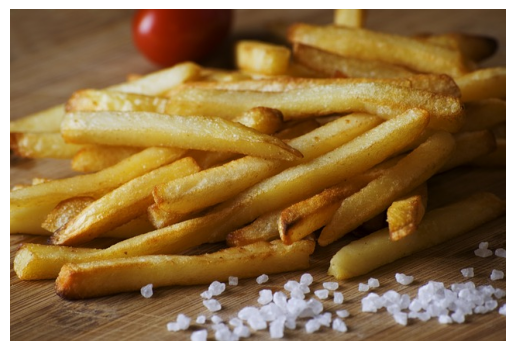

In [9]:
# Example usage
img_path = 'images/French_Fries.JPG'
plt.imshow(image.load_img(img_path))
plt.axis('off')
result = predict_image(img_path)
print(f'The predicted class is: {result}')